In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
la_de=pd.read_csv("/content/Language Detection.csv")

In [3]:
la_de.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
la_de.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [5]:
la_de.shape

(10337, 2)

In [6]:
la_de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
la_de.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
la_de.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,mijn excuses.,English
freq,3,1385


In [9]:
la_de[la_de.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [10]:
la_de.drop(la_de[la_de.duplicated()].index,axis=0,inplace=True)

In [11]:
la_de["Language"].nunique()

17

In [12]:
la_de["Language"].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

#Data Visualztion #

<ipython-input-13-46a6ef602535>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Language', data=la_de, palette='viridis', order=la_de['Language'].value_counts().index)


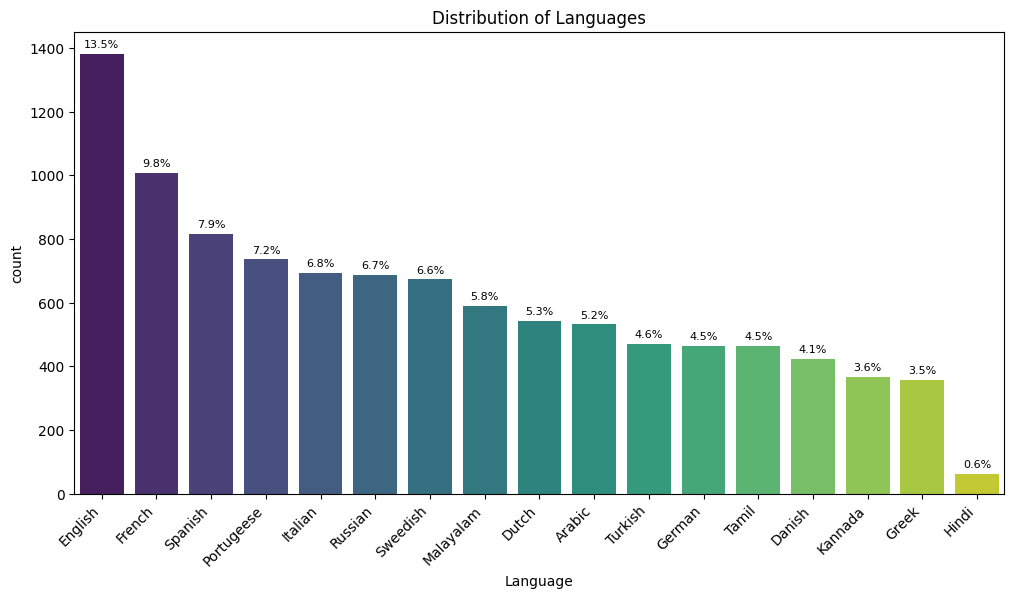

In [13]:
# Count plot with percentage annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=la_de, palette='viridis', order=la_de['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations
total = len(la_de)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

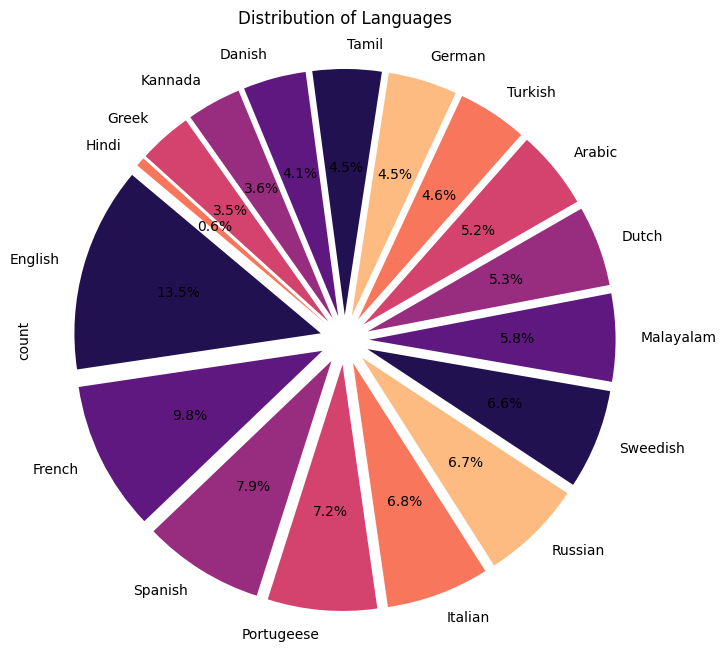

In [14]:
# Pie plot
plt.figure(figsize=(8, 8))
la_de['Language'].value_counts().loc[la_de['Language'].value_counts().index].plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'), explode=[0.1] * len(la_de['Language'].unique()))
plt.title('Distribution of Languages')
plt.show()

#Data#

In [15]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)

    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace

    return Text

In [16]:
la_de["transform_text"]=la_de["Text"].apply(clean_function)

In [17]:
la_de.head()

,Text,Language,transform_text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...


In [18]:
x=la_de['transform_text']
y=la_de['Language']

In [19]:
x

0         nature in the broadest sense is the natural p...
1         nature can refer to the phenomena of the phys...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: transform_text, Length: 10271, dtype: object

In [20]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10271, dtype: object

In [21]:
tf=TfidfVectorizer(max_features=5000)
x=tf.fit_transform(la_de["transform_text"]).toarray()
print(x.shape)
le=LabelEncoder()
y=le.fit_transform(y)

(10271, 5000)


In [22]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3,stratify=y)

In [25]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7189, 5000) (3082, 5000) (7189,) (3082,)


# Model Training#

Model: Logistic Regression
Accuracy: 0.9555483452303699
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       160
           1       0.98      0.94      0.96       127
           2       0.99      0.96      0.97       163
           3       0.98      0.99      0.98       415
           4       0.99      0.96      0.98       302
           5       0.98      0.92      0.95       140
           6       1.00      0.93      0.97       107
           7       1.00      0.84      0.91        19
           8       0.99      0.94      0.97       208
           9       1.00      0.96      0.98       110
          10       1.00      0.97      0.98       177
          11       1.00      0.95      0.97       221
          12       0.68      1.00      0.81       206
          13       0.93      0.98      0.96       245
          14       0.97      0.96      0.97       202
          15       1.00      0.97      0.99       139
  

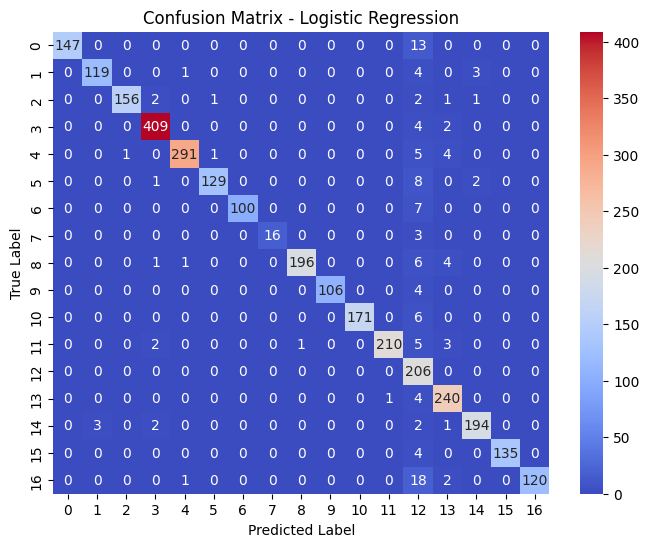



Model: Random Forest
Accuracy: 0.9331602855288773
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       160
           1       0.95      0.91      0.93       127
           2       0.97      0.94      0.96       163
           3       0.98      0.96      0.97       415
           4       0.96      0.94      0.95       302
           5       0.94      0.90      0.92       140
           6       1.00      0.93      0.97       107
           7       1.00      0.89      0.94        19
           8       0.96      0.90      0.93       208
           9       1.00      0.96      0.98       110
          10       1.00      0.96      0.98       177
          11       0.97      0.91      0.94       221
          12       1.00      0.90      0.95       206
          13       0.92      0.93      0.92       245
          14       0.96      0.93      0.94       202
          15       1.00      0.96      0.98       139
      

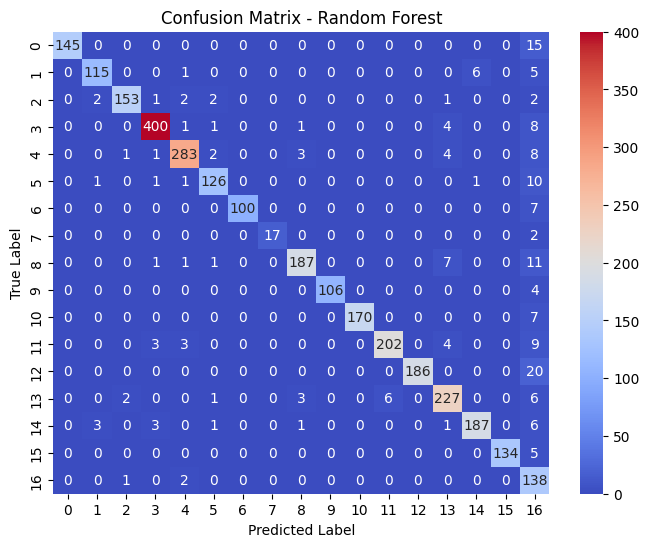



Model: svc
Accuracy: 0.9497079818299805
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       160
           1       0.95      0.94      0.94       127
           2       0.98      0.95      0.97       163
           3       0.98      0.99      0.98       415
           4       0.99      0.96      0.98       302
           5       0.98      0.91      0.94       140
           6       1.00      0.93      0.96       107
           7       1.00      0.84      0.91        19
           8       0.99      0.94      0.96       208
           9       1.00      0.95      0.98       110
          10       1.00      0.96      0.98       177
          11       0.99      0.94      0.96       221
          12       0.65      1.00      0.79       206
          13       0.95      0.96      0.95       245
          14       0.97      0.95      0.96       202
          15       1.00      0.96      0.98       139
          16    

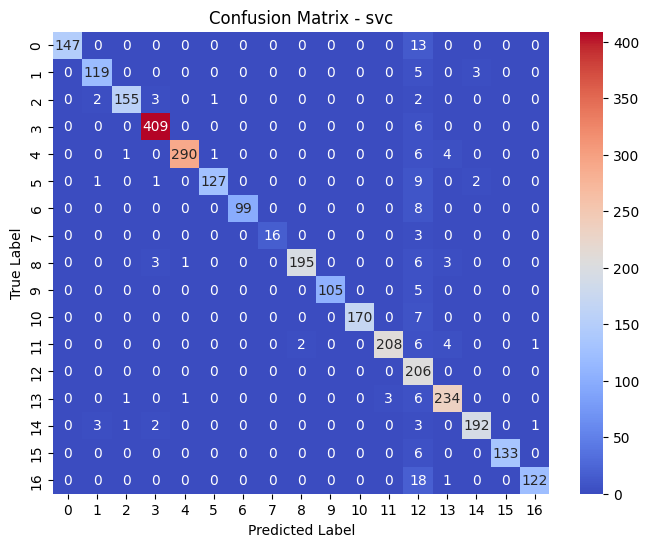



Model: mnb
Accuracy: 0.9600908500973394
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       160
           1       1.00      0.91      0.95       127
           2       0.99      0.97      0.98       163
           3       0.81      1.00      0.89       415
           4       0.98      0.99      0.98       302
           5       1.00      0.92      0.96       140
           6       1.00      0.94      0.97       107
           7       1.00      0.79      0.88        19
           8       1.00      0.96      0.98       208
           9       1.00      0.97      0.99       110
          10       1.00      0.97      0.99       177
          11       1.00      0.96      0.98       221
          12       1.00      0.93      0.96       206
          13       0.97      0.98      0.98       245
          14       0.95      0.98      0.97       202
          15       1.00      0.99      1.00       139
          16    

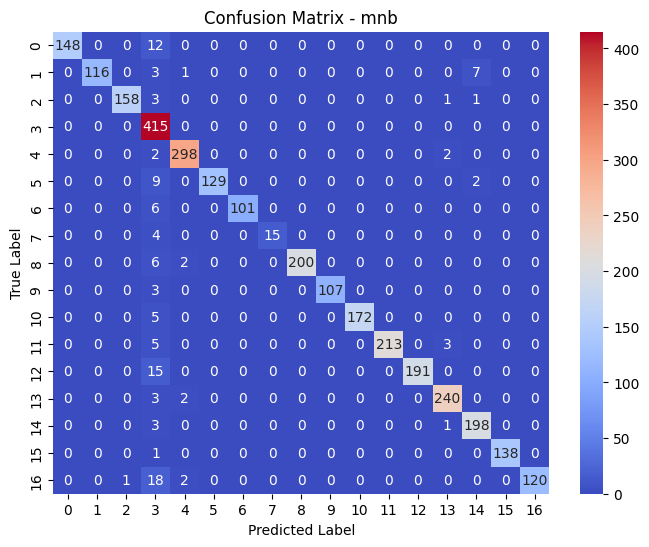

In [26]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=2),
    'svc' : SVC(kernel='sigmoid', gamma=1.0),
    'mnb' : MultinomialNB(),

}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_report_str}')


    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print('\n' + '='*50 + '\n')

##Test Model##

In [27]:
def predict(text):
    lang = model.predict(tf.transform([text]))
    language = le.inverse_transform(lang)[0]
    print('The Language is in', language)

In [34]:
la_de['Text'].iloc[8980]

'[53] قد يتم قفل مقال مثير للجدل بشكل خاص حتى يتمكن المسؤولون فقط من إجراء تغييرات.'

In [35]:
# English
predict("Nature can refer to the phenomena of the physical world, and also to life in general.")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("قد يتم قفل مقال مثير للجدل بشكل خاص حتى يتمكن المسؤولون فقط من إجراء تغييرات")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")

The Language is in English
The Language is in French
The Language is in Arabic
The Language is in Spanish
